In [1]:
import os, sys
import graphlab as gl
import graphlab.aggregate as agg
from tqdm import tqdm_notebook as tqdm

# set canvas path
# gl.canvas.set_target('ipynb')

%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This non-commercial license of GraphLab Create for academic use is assigned to sudhanshu.shekhar.iitd@gmail.com and will expire on August 27, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1504726179.log


# Read some product review data

In [3]:
products = gl.SFrame('data/amazon_baby.gl/')

# Explore this data

In [4]:
products.head()

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


# Build a word count vector for each review

In [6]:
products['word_count'] = gl.text_analytics.count_words(products['review'])

In [7]:
products.head()

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'and': 5, '6': 1,'stink': 1, 'because' ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3, 'love': 1,'it': 2, 'highly': 1, ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2, 'quilt': 1,'it': 1, 'comfortable': ..."
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'ingenious': 1, 'and':3, 'love': 2, ..."
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'and': 2, 'parents!!':1, 'all': 2, 'puppet.': ..."
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'and': 2, 'this': 2,'her': 1, 'help': 2, ..."
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'shop': 1, 'noble': 1,'is': 1, 'it': 1, 'as': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'and': 2, 'all': 1,'right': 1, 'when': 1, ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'and': 1, 'help': 1,'give': 1, 'is': 1, ' ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'journal.': 1, 'nanny':1, 'standarad': 1, ..."


# Explore Villi Sophie

In [8]:
giraffe_reviews = products[products['name'] == 'Vulli Sophie the Giraffe Teether']

In [9]:
len(giraffe_reviews)

785

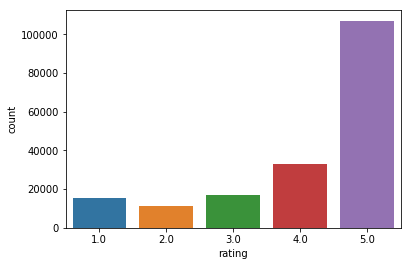

In [11]:
sns.countplot(x="rating", data=products.to_dataframe())

# Build a sentiment classifier

## Define what a positive and negative sentiment

In [14]:
#ignore all 3 star reviews

In [15]:
products = products[products['rating'] != 3]

In [16]:
len(products)

166752

In [17]:
#positive sentiment is 4/5 star ; negative sentiment is 1/2 star

In [18]:
products['sentiment'] = products['rating'] >= 4

In [19]:
products.head()

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3, 'love': 1,'it': 2, 'highly': 1, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2, 'quilt': 1,'it': 1, 'comfortable': ...",1
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'ingenious': 1, 'and':3, 'love': 2, ...",1
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'and': 2, 'parents!!':1, 'all': 2, 'puppet.': ...",1
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'and': 2, 'this': 2,'her': 1, 'help': 2, ...",1
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'shop': 1, 'noble': 1,'is': 1, 'it': 1, 'as': ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'and': 2, 'all': 1,'right': 1, 'when': 1, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'and': 1, 'help': 1,'give': 1, 'is': 1, ' ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'journal.': 1, 'nanny':1, 'standarad': 1, ...",1
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'all': 1, 'forget': 1,'just': 1, 'food': 1, ...",1


## Lets train the sentiment classifier

In [20]:
train_data, test_data = products.random_split(0.8, seed=0)

In [21]:
sentiment_model = gl.logistic_classifier.create(train_data,
                                                      target='sentiment',
                                                      features=['word_count'],
                                                      validation_set=test_data)

WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 219217

Number of coefficients    : 219218

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 5        | 0.000002  | 2.111410     | 0.841481          | 0.839989            |

| 2         | 9        | 3.000000  | 3.195583     | 0.947425          | 0.894877            |

| 3         | 10       | 3.000000  | 3.631321     | 0.923768          | 0.866232            |

| 4         | 11       | 3.000000  | 4.026473     | 0.971779          | 0.912743            |

| 5         | 12       | 3.000000  | 4.439213     | 0.975511          | 0.908900            |

| 6         | 13       | 3.000000  | 4.839930     | 0.899991          | 0.825967            |

| 10        | 18       | 1.000000  | 6.934126     | 0.988715          | 0.916256            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

## Evaluate the sentiment model

In [26]:
sentiment_model.evaluate(test_data, metric='roc_curve')

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+----------------+----------------+-------+------+
 | threshold |      fpr       |      tpr       |   p   |  n   |
 +-----------+----------------+----------------+-------+------+
 |    0.0    |      1.0       |      1.0       | 27976 | 5328 |
 |   1e-05   | 0.909346846847 | 0.998856162425 | 27976 | 5328 |
 |   2e-05   | 0.896021021021 | 0.998748927652 | 27976 | 5328 |
 |   3e-05   | 0.886448948949 | 0.998462968259 | 27976 | 5328 |
 |   4e-05   | 0.879692192192 | 0.998284243637 | 27976 | 5328 |
 |   5e-05   | 0.875187687688 | 0.998212753789 | 27976 | 5328 |
 |   6e-05   | 0.872184684685 | 0.998177008865 | 27976 | 5328 |
 |   7e-05   | 0.868618618619 | 0.998034029168 | 27976 | 5328 |
 |   8e-05   | 0.864677177177 | 0.997998284244 | 27976 | 5328 |
 |   9e-05   | 0.860735735736 | 0.997962539319 | 27976 | 5328 |
 +-----------+----------------+----------------+-------+------

# Apply the learned model to understand the sentiment for giraffe

In [31]:
giraffe_reviews['predicted_sentiment'] = sentiment_model.predict(giraffe_reviews, output_type='probability')

In [32]:
giraffe_reviews.head()

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'and': 1, 'all': 1,'because': 1, 'it': 1, ...",0.999513023521
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'and': 1, 'right': 1,'help': 1, 'just': 1, ...",0.999320678306
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'and': 2, 'all': 1,'would': 1, 'latex.': 1, ...",0.013558811687
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'and': 2, 'one!': 1,'all': 1, 'love': 1, ...",0.995769474148
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'and': 3, 'all': 1,'months': 1, 'old': 1, ...",0.662374415673
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'and': 6, 'seven': 1,'already': 1, 'love': 1, ...",0.999997148186
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'and': 4, 'drooling,':1, 'love': 1, ...",0.989190989536
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'and': 3, 'chew': 1,'be': 1, 'is': 1, ...",0.999563518413
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'chew': 2, 'seemed': 1,'because': 1, 'about.': ...",0.970160542725
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0,"{'and': 2, 'already': 1,'some': 1, 'it': 3, ...",0.195367644588


## Sort the reviews based on the predicted sentiment and explore

In [33]:
giraffe_reviews = giraffe_reviews.sort(
    'predicted_sentiment', 
    ascending=False
)

In [34]:
giraffe_reviews.head()

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5.0,"{'giggles': 1, 'all': 1,""violet's"": 2, 'bring': ...",1.0
Vulli Sophie the GiraffeTeether ...,I'm not sure why Sophieis such a hit with the ...,4.0,"{'adoring': 1, 'find': 1,'month': 1, 'bright': 1, ...",0.999999999703
Vulli Sophie the GiraffeTeether ...,I'll be honest...I boughtthis toy because all the ...,4.0,"{'all': 2, 'discovered':1, 'existence.': 1, ...",0.999999999392
Vulli Sophie the GiraffeTeether ...,We got this littlegiraffe as a gift from a ...,5.0,"{'all': 2, ""don't"": 1,'(literally).so': 1, ...",0.99999999919
Vulli Sophie the GiraffeTeether ...,As a mother of 16monthold twins; I bought ...,5.0,"{'cute': 1, 'all': 1,'reviews.': 2, 'just' ...",0.999999998657
Vulli Sophie the GiraffeTeether ...,Sophie the Giraffe is theperfect teething toy. ...,5.0,"{'just': 2, 'both': 1,'month': 1, 'ears,': 1, ...",0.999999997108
Vulli Sophie the GiraffeTeether ...,Sophie la giraffe isabsolutely the best toy ...,5.0,"{'and': 5, 'the': 1,'all': 1, 'that': 2, ...",0.999999995589
Vulli Sophie the GiraffeTeether ...,My 5-mos old son took tothis immediately. The ...,5.0,"{'just': 1, 'shape': 2,'mutt': 1, '""dog': 1, ...",0.999999995573
Vulli Sophie the GiraffeTeether ...,My nephews and my fourkids all had Sophie in ...,5.0,"{'and': 4, 'chew': 1,'all': 1, 'perfect;': 1, ...",0.999999989527
Vulli Sophie the GiraffeTeether ...,Never thought I'd see myson French kissing a ...,5.0,"{'giggles': 1, 'all': 1,'out,': 1, 'over': 1, ...",0.999999985069


In [35]:
giraffe_reviews[0]['review']

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viol

In [36]:
giraffe_reviews[1]['review']

"I'm not sure why Sophie is such a hit with the little ones, but my 7 month old baby girl is one of her adoring fans.  The rubber is softer and more pleasant to handle, and my daughter has enjoyed chewing on her legs and the nubs on her head even before she started teething.  She also loves the squeak that Sophie makes when you squeeze her.  Not sure what it is but if Sophie is amongst a pile of her other toys, my daughter will more often than not reach for Sophie.  And I have the peace of mind of knowing that only edible and safe paints and materials have been used to make Sophie, as opposed to Bright Starts and other baby toys made in China.  Now that the research is out on phthalates and other toxic substances in baby toys, I think it's more important than ever to find good quality toys that are also safe for our babies to handle and put in their mouths.  Sophie is a must-have for every new mom in my opinion.  Even if your kid is one of the few that can take or leave her, it's worth

## Show some negative reviews

In [37]:
giraffe_reviews[-1]['review']

"My son (now 2.5) LOVED his Sophie, and I bought one for every baby shower I've gone to. Now, my daughter (6 months) just today nearly choked on it and I will never give it to her again. Had I not been within hearing range it could have been fatal. The strange sound she was making caught my attention and when I went to her and found the front curved leg shoved well down her throat and her face a purply/blue I panicked. I pulled it out and she vomited all over the carpet before screaming her head off. I can't believe how my opinion of this toy has changed from a must-have to a must-not-use. Please don't disregard any of the choking hazard comments, they are not over exaggerated!"

In [38]:
giraffe_reviews[-2]['review']

"This children's toy is nostalgic and very cute. However, there is a distinct rubber smell and a very odd taste, yes I tried it, that my baby did not enjoy. Also, if it is soiled it is extremely difficult to clean as the rubber is a kind of porus material and does not clean well. The final thing is the squeaking device inside which stopped working after the first couple of days. I returned this item feeling I had overpaid for a toy that was defective and did not meet my expectations. Please do not be swayed by the cute packaging and hype surounding it as I was. One more thing, I was given a full refund from Amazon without any problem."